<a href="https://colab.research.google.com/github/sreemathymahes/Data_Analytics/blob/main/DataAnalytics_Final_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#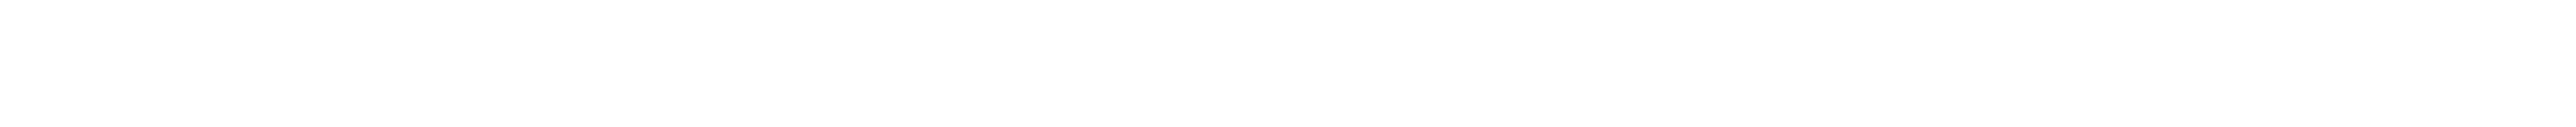

## Problem Definition

We will be addressing a binary classification problem, where each sample can only belong to one of two classes. This is an example of information based learning. Specifically, we will utilize various clinical parameters about a patient to determine whether or not they are likely to have heart disease.In other words, the task at hand is to predict whether a patient has heart disease based on their clinical characteristics.

## Data Source

dataset from kaggle : https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data

## Importing Necessary Libraries

In [ ]:
!pip install scikit-learn==0.24.0


  Using cached scikit-learn-0.24.0.tar.gz (7.4 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for scikit-learn (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for scikit-learn
Failed to build scikit-learn
ERROR: Could not build wheels for scikit-learn, which is required to install pyproject.toml-based projects


In [ ]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

##Resampling
from imblearn.over_sampling import SMOTE


## Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


## Loading Data

In [ ]:
from google.colab import files

# Upload your Kaggle API credentials file (kaggle.json)
uploaded = files.upload()


Saving heartdisease.zip to heartdisease.zip


In [ ]:
#Moving the credentials to the appropriate location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#Downloading the dataset from kaggle
!kaggle datasets download -d alexteboul/heart-disease-health-indicators-dataset


heart-disease-health-indicators-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Unzip the dataset
!unzip heartdisease.zip

Archive:  heartdisease.zip
  inflating: heart_disease_health_indicators_BRFSS2015.csv  


In [ ]:
# Replace the file name with the actual name of your CSV file if it's different
df = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
df.shape


(253680, 22)

## Data Pre-Processing And Visualization

In [ ]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.dtypes

HeartDiseaseorAttack    float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
Diabetes                float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Let's check the top 5 rows of our dataframe
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'HeartDisease' is the column of interest
heart_disease_counts = df['HeartDiseaseorAttack'].value_counts()

# Calculate the percentage
percentage_no_heart_disease = (heart_disease_counts[0] / len(df)) * 100
percentage_heart_disease = (heart_disease_counts[1] / len(df)) * 100

print(f"Percentage of data without heart disease (0): {percentage_no_heart_disease:.2f}%")
print(f"Percentage of data with heart disease (1): {percentage_heart_disease:.2f}%")


Percentage of data without heart disease (0): 90.58%
Percentage of data with heart disease (1): 9.42%


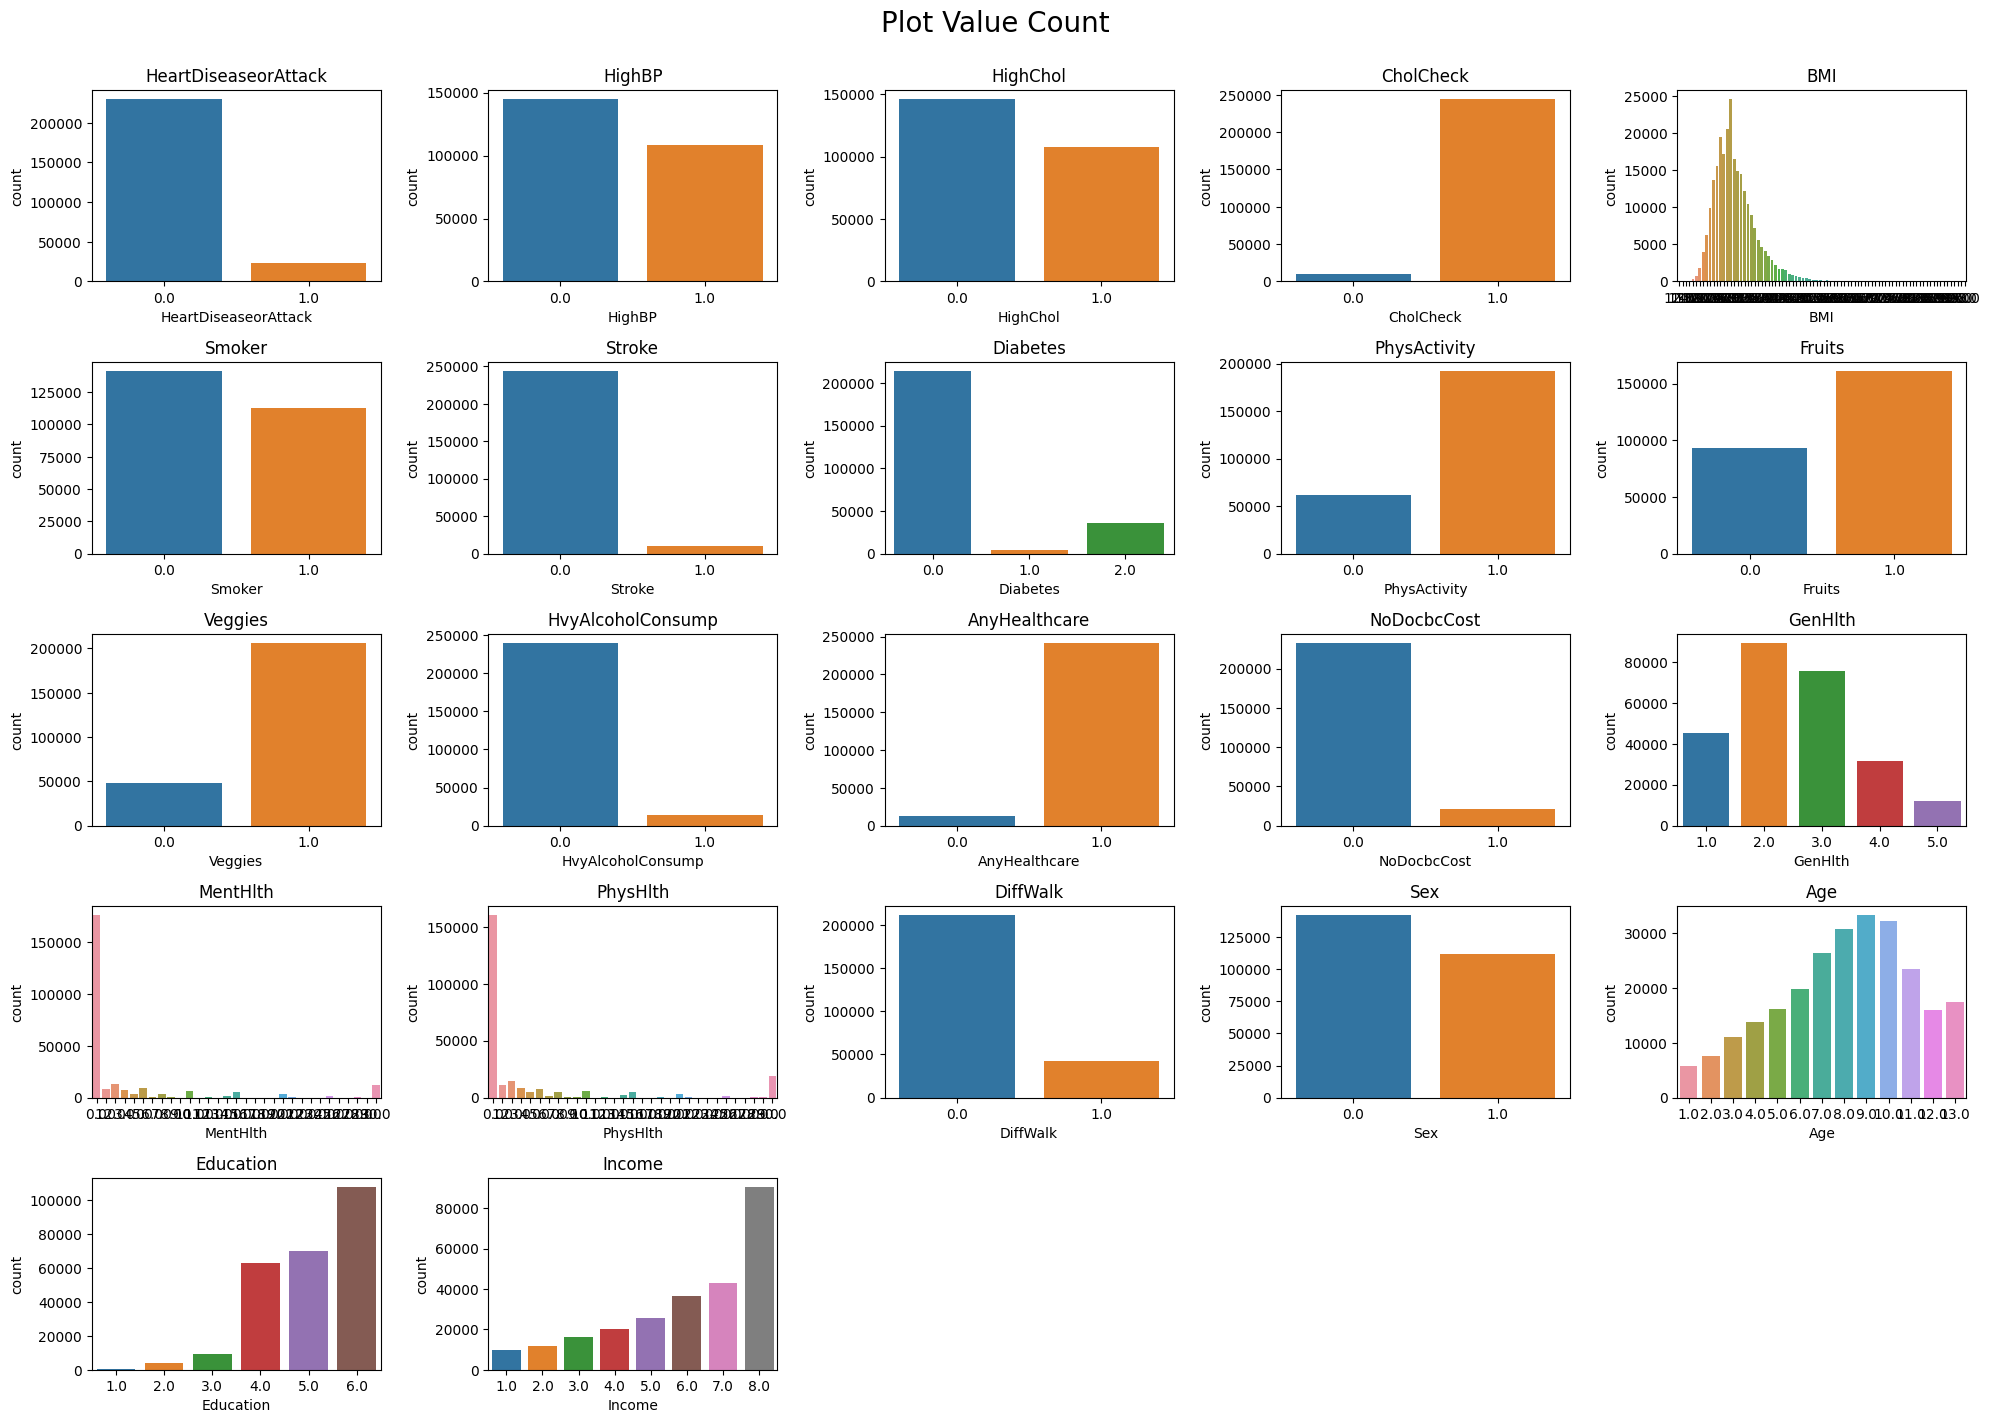

In [ ]:
# Countplot on each feature
plt.figure(figsize=(20,60))
for i,column in enumerate(df.columns):
    plt.subplot(len(df.columns), 5, i+1)
    plt.suptitle("Plot Value Count", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

In [ ]:
import pandas as pd

def identify_binary_non_binary(df):
    binary_attributes = []
    non_binary_attributes = []

    for column in df.columns:
        unique_values = df[column].nunique()
        if unique_values == 2:
            binary_attributes.append(column)
        else:
            non_binary_attributes.append(column)

    return binary_attributes, non_binary_attributes

# Example usage:
# Assuming 'your_dataframe' is your DataFrame
# Replace it with the actual variable name of your DataFrame
binary_attrs, non_binary_attrs = identify_binary_non_binary(df)

print("Binary Attributes:", binary_attrs)
print("Non-Binary Attributes:", non_binary_attrs)


Binary Attributes: ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Non-Binary Attributes: ['BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']


Here, we'll compare all of the independent variables in one hit.

Using df.corr()  will create a correlation matrix, in other words.

In [ ]:
# Finding the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [ ]:
# Assuming df is your DataFrame and "HeartDiseaseorAttack" is the target column
target_column = "HeartDiseaseorAttack"

# Convert non-numeric columns to numeric
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Check for missing values
if df_numeric.isnull().values.any():
    # Handle missing values (you can choose to drop or fill them)
    df_numeric = df_numeric.dropna()  # or df_numeric.fillna(some_value)

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Get the correlation values for the target column
corr_with_target = corr_matrix[target_column]

# Sort the correlations in descending order and get the top 6
top_6_attributes = corr_with_target.abs().sort_values(ascending=False).index[1:7]

print(f"The top 6 attributes with high correlation with '{target_column}':")
for attribute in top_6_attributes:
    correlation_value = corr_matrix.loc[target_column, attribute]
    print(f"{attribute}: {correlation_value}")


The top 6 attributes with high correlation with 'HeartDiseaseorAttack':
GenHlth: 0.25838340865872433
Age: 0.22161763244723504
DiffWalk: 0.21270869529038605
HighBP: 0.20936121069003574
Stroke: 0.2030019399902929
PhysHlth: 0.18169753577563633


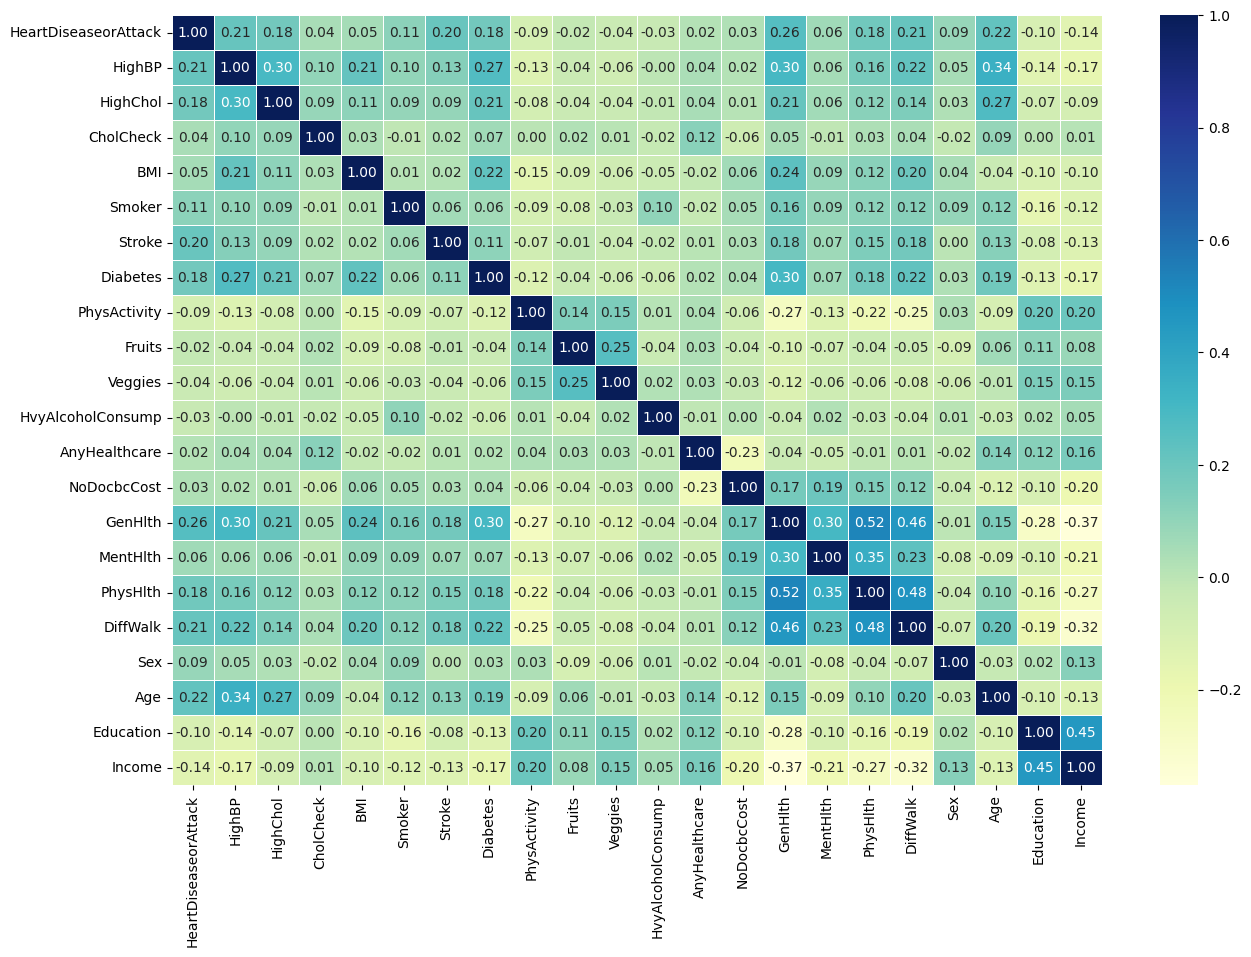

In [ ]:
# Visualizing the correlation matrix with seaborn
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt= ".2f",
            cmap="YlGnBu");

 A higher positive value means a potential positive correlation (increase) and a higher negative value means a potential negative correlation (decrease).

So as we're trying to predict our target variable using all of the other variables.

## Resampling


Resampling is a technique used in machine learning to address class imbalance in the dataset. In our case, the target variable is heart disease, and you have a significant class imbalance with 90.58% of the data labeled as 0 (without heart disease) and only 9.42% labeled as 1 (with heart disease).



Oversampling (SMOTE: Synthetic Minority Over-sampling Technique):

In [ ]:
!pip install imbalanced-learn


Splitting the target variable from the rest.

In [ ]:
from imblearn.over_sampling import SMOTE


X = df.drop('HeartDiseaseorAttack', axis=1)  # Features
y = df['HeartDiseaseorAttack']  # Target variable



In [ ]:
print(X.size)
print(y.size)

percentage_y = (y[y == 1].size / y.size) * 100
print(f"Percentage of people with heart disease before resampling: {percentage_y:.2f}%")


5327280
253680
Percentage of people with heart disease before resampling: 9.42%


## Splitting our data into train and test

Dividing our data like, 80% to train on and the other 20% to test.

In [ ]:
# Oversampling (SMOTE)
X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
print(X_resampled.size)
print(y_resampled.size)

percentage_resampled = (y_resampled[y_resampled == 1].size / y_resampled.size) * 100
print(f"Percentage of people with heart disease: {percentage_resampled:.2f}%")


9651054
459574
Percentage of people with heart disease: 50.00%


In [ ]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
253675    0.0
253676    0.0
253677    0.0
253678    0.0
253679    1.0
Name: HeartDiseaseorAttack, Length: 253680, dtype: float64

## Modelling our data

Our problem statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

Let's keep the evaluation metric whether we can reach 95% accuracy at predicting whether or not a patient has heart disease.

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
X_train.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
307216,0.853811,0.853811,1.0,29.00000,1.0,0.0,0.0,0.853811,0.00000,0.853811,...,1.0,0.00000,4.00000,0.0,0.0,0.00000,1.0,10.0,2.00000,1.146189
231292,0.000000,0.000000,1.0,23.00000,0.0,0.0,0.0,1.000000,1.00000,1.000000,...,1.0,0.00000,1.00000,1.0,0.0,0.00000,0.0,9.0,6.00000,8.000000
68873,1.000000,1.000000,1.0,36.00000,0.0,0.0,1.0,1.000000,1.00000,1.000000,...,1.0,0.00000,2.00000,0.0,0.0,0.00000,0.0,10.0,6.00000,8.000000
405199,0.000000,1.000000,1.0,27.00000,0.0,0.0,0.0,1.000000,1.00000,1.000000,...,1.0,0.00000,2.00000,0.0,0.0,0.00000,1.0,8.0,6.00000,8.000000
355552,1.000000,1.000000,1.0,28.89097,0.0,0.0,2.0,0.109030,0.89097,1.000000,...,1.0,0.89097,4.10903,10.0,30.0,0.89097,0.0,8.0,4.10903,3.109030


In [ ]:
y_train, len(y_train)


(307216    1.0
 231292    0.0
 68873     0.0
 405199    1.0
 355552    1.0
          ... 
 259178    1.0
 365838    1.0
 131932    0.0
 146867    0.0
 121958    0.0
 Name: HeartDiseaseorAttack, Length: 367659, dtype: float64,
 367659)

In [ ]:
X_test.head()


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
443921,1.0,0.485406,1.000000,37.485406,0.514594,0.0,0.0,1.000000,1.0,1.000000,...,1.0,0.0,2.029189,15.0,0.514594,0.000000,1.0,6.514594,5.485406,8.0
255793,1.0,1.000000,1.000000,26.401924,0.598076,0.0,0.0,0.401924,1.0,0.401924,...,1.0,0.0,3.000000,0.0,2.598076,0.000000,1.0,7.401924,6.000000,8.0
41737,1.0,1.000000,1.000000,28.000000,0.000000,0.0,0.0,1.000000,1.0,1.000000,...,1.0,0.0,2.000000,0.0,0.000000,0.000000,0.0,10.000000,6.000000,8.0
263533,1.0,0.225312,0.225312,35.774688,0.000000,0.0,0.0,0.000000,0.0,0.225312,...,1.0,0.0,2.225312,0.0,0.000000,0.225312,1.0,13.000000,4.225312,5.0
171924,0.0,1.000000,1.000000,19.000000,0.000000,0.0,0.0,1.000000,1.0,1.000000,...,1.0,0.0,1.000000,0.0,0.000000,0.000000,0.0,10.000000,5.000000,7.0


In [ ]:
y_test, len(y_test)


(443921    1.0
 255793    1.0
 41737     0.0
 263533    1.0
 171924    0.0
          ... 
 261018    1.0
 305199    1.0
 186932    0.0
 91513     0.0
 92015     0.0
 Name: HeartDiseaseorAttack, Length: 91915, dtype: float64,
 91915)

And here there are 59 examples we'll test the models on

## Choosing the best model

Using the following and comparing their results.

Logistic Regression, K-Nearest Neighbors, RandomForest - RandomForestClassifier()

let's put them in a dictionary and which fits and scores them.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Assuming X and y are your features and labels, adjust accordingly
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Put models in a dictionary
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier()
}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make dictionaries to keep model scores and predictions
    #model_scores = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': []}

    model_scores = {}
    model_predictions = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Make predictions on the test data
        predictions = model.predict(X_test)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        # Store predictions in model_predictions
        model_predictions[name] = predictions
    return model_scores, model_predictions




In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


({'KNN': 0.8593809497905673,
  'Logistic Regression': 0.7784909971169015,
  'Random Forest': 0.9479083936245444},
 {'KNN': array([1., 1., 1., ..., 0., 0., 0.]),
  'Logistic Regression': array([0., 1., 0., ..., 0., 0., 0.]),
  'Random Forest': array([1., 1., 0., ..., 0., 0., 0.])})

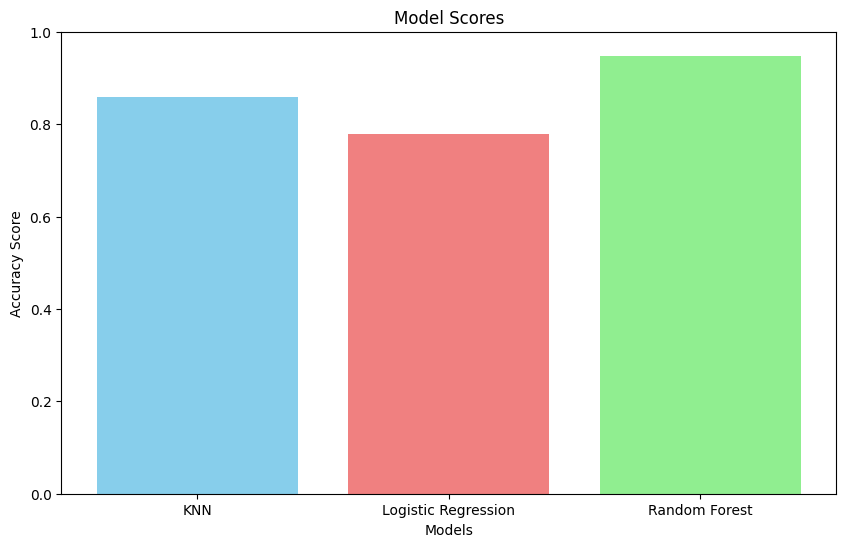

In [ ]:
import matplotlib.pyplot as plt

def plot_model_scores(model_scores):
    """
    Plots the model scores.
    model_scores : a tuple containing a dictionary with model names as keys and corresponding scores as values
    """
    # Access the dictionary within the tuple
    model_scores_dict = model_scores[0]

    model_names = list(model_scores_dict.keys())
    scores = list(model_scores_dict.values())

    # Define custom colors for each model
    colors = ['skyblue', 'lightcoral', 'lightgreen']

    plt.figure(figsize=(10, 6))
    plt.bar(model_names, scores, color=colors)
    plt.title('Model Scores')
    plt.xlabel('Models')
    plt.ylabel('Accuracy Score')
    plt.ylim(0, 1)  # Set y-axis limit to represent accuracy percentage
    plt.show()

# Plot the model scores with custom colors
plot_model_scores(model_scores)


## Evaulation Metrics

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

def fit_and_score_with_report(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models and prints classification report.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels associated with training data
    y_test : labels associated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Make a dictionary to keep classification reports
    classification_reports = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)
        # Classification report
        classification_reports[name] = classification_report(y_test, y_pred)
        # Extract recall value from the classification report
        # Extract recall value from the classification report
        recall = classification_report(y_test, y_pred, output_dict=True)['1.0']['recall']
        # Evaluate the model and append its score to model_scores
        model_scores[name] = {'accuracy': model.score(X_test, y_test), 'recall': recall}
    return model_scores, classification_reports


In [ ]:

# Get model scores and classification reports
model_scores, classification_reports = fit_and_score_with_report(models=models,
                                                                 X_train=X_train,
                                                                 X_test=X_test,
                                                                 y_train=y_train,
                                                                 y_test=y_test)

# Print model scores
print("Model Scores:")
for name, scores in model_scores.items():
    print(f"Model: {name}\nAccuracy: {scores['accuracy']:.2f}, Recall: {scores['recall']:.2f}\n")

# Print classification reports
print("\nClassification Reports:")
for name, report in classification_reports.items():
    print(f"Model: {name}\n{report}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Scores:
Model: KNN
Accuracy: 0.86, Recall: 0.99

Model: Logistic Regression
Accuracy: 0.78, Recall: 0.81

Model: Random Forest
Accuracy: 0.95, Recall: 0.92


Classification Reports:
Model: KNN
              precision    recall  f1-score   support

         0.0       0.99      0.73      0.84     46033
         1.0       0.78      0.99      0.88     45882

    accuracy                           0.86     91915
   macro avg       0.89      0.86      0.86     91915
weighted avg       0.89      0.86      0.86     91915


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77     46033
         1.0       0.76      0.81      0.78     45882

    accuracy                           0.78     91915
   macro avg       0.78      0.78      0.78     91915
weighted avg       0.78      0.78      0.78     91915


Model: Random Forest
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.9

##Feature importance

Now let's evaluate which feature contributes the most to predict the target variable.

To answer, "which features contributing most to the outcomes of the model?"

Means, while trying to predict heart disease using a patient's medical characterisitcs, which charateristics contribute most to a model predicting whether someone has heart disease or not?

Unlike some other functions we've observed, the way each model identifies patterns in data varies slightly, and consequently, the criteria a model uses to determine the importance of these patterns also differs. This implies that each model utilizes a slightly distinct approach to identify the most significant features.


####**RandomForestClassifier**()


In [ ]:
# Create a Random Forest classifier
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train, y_train);


In [ ]:
# Get feature importances
feature_importances = clf_rf.feature_importances_

In [ ]:
# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Select the top 15 features based on importance
top_features_rf = feature_importance_df.nlargest(15, 'Importance')['Feature'].tolist()

# Output the selected top 15 features for confirmation
print('Top 15 features based on importance:\n', top_features_rf)

Top 15 features based on importance:
 ['HighBP', 'HighChol', 'GenHlth', 'Age', 'Smoker', 'Sex', 'BMI', 'DiffWalk', 'Income', 'Stroke', 'Education', 'Fruits', 'PhysActivity', 'PhysHlth', 'Veggies']


Feature ranking:
1. Feature HighBP (0.1347)
2. Feature HighChol (0.1261)
3. Feature GenHlth (0.1135)
4. Feature Age (0.0989)
5. Feature Smoker (0.0708)
6. Feature Sex (0.0686)
7. Feature BMI (0.0583)
8. Feature DiffWalk (0.0564)
9. Feature Income (0.0442)
10. Feature Stroke (0.0377)
11. Feature Education (0.0324)
12. Feature Fruits (0.0285)
13. Feature PhysActivity (0.0273)
14. Feature PhysHlth (0.0256)
15. Feature Veggies (0.0204)
16. Feature MentHlth (0.0188)
17. Feature Diabetes (0.0156)
18. Feature HvyAlcoholConsump (0.0086)
19. Feature NoDocbcCost (0.0081)
20. Feature AnyHealthcare (0.0037)
21. Feature CholCheck (0.0018)


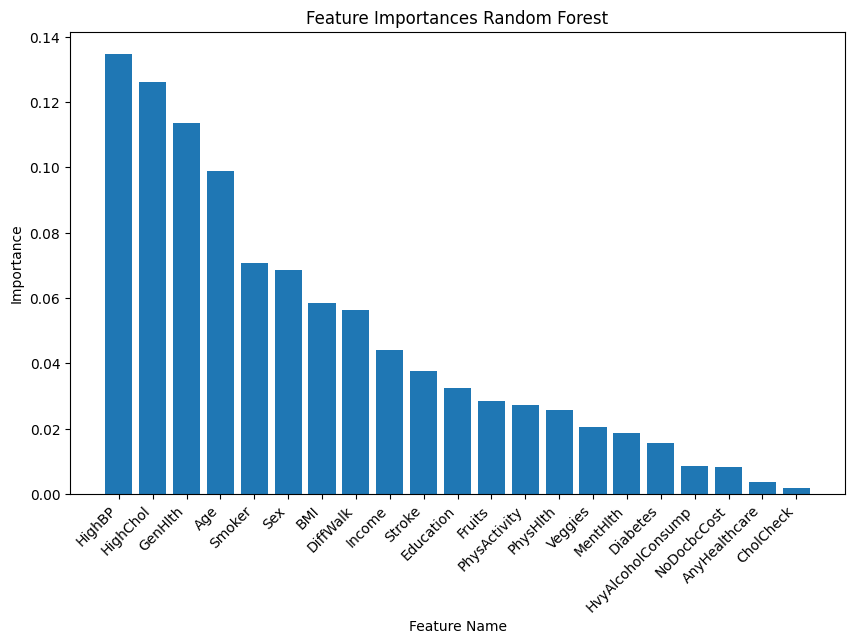

In [ ]:
# Get the indices of features sorted by importance
indices = np.argsort(feature_importances)[::-1]

# Get the feature names from the column names of X_train
feature_names = X_train.columns.tolist()

# Print the feature ranking with original feature names
print("Feature ranking:")
for f in range(X_train.shape[1]):
    original_feature_name = feature_names[indices[f]]
    print(f"{f + 1}. Feature {original_feature_name} ({feature_importances[indices[f]]:.4f})")

# Plot the feature importances with original feature names
plt.figure(figsize=(10, 6))
plt.title("Feature Importances Random Forest")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=45, ha="right")
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.show()

In [ ]:



# Subset X_train with the top features
X_train_top_rf = X_train[top_features_rf]
X_test_top_rf= X_test[top_features_rf]

# Get model scores and classification reports
model_scores_rf, classification_reports_rf = fit_and_score_with_report(models=models,
                                                                 X_train=X_train_top_rf,
                                                                 X_test=X_test_top_rf,
                                                                 y_train=y_train,
                                                                 y_test=y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print model scores
print("Model Scores:")
for name, scores in model_scores_rf.items():
    print(f"Model: {name}\nAccuracy: {scores['accuracy']:.2f}, Recall: {scores['recall']:.2f}\n")

# Print classification reports
print("\nClassification Reports:")
for name, report in classification_reports_rf.items():
    print(f"Model: {name}\n{report}\n")

Model Scores:
Model: KNN
Accuracy: 0.85, Recall: 0.98

Model: Logistic Regression
Accuracy: 0.78, Recall: 0.81

Model: Random Forest
Accuracy: 0.94, Recall: 0.92


Classification Reports:
Model: KNN
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     46033
         1.0       0.78      0.98      0.87     45882

    accuracy                           0.85     91915
   macro avg       0.88      0.85      0.85     91915
weighted avg       0.88      0.85      0.85     91915


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.78     46033
         1.0       0.77      0.81      0.79     45882

    accuracy                           0.78     91915
   macro avg       0.78      0.78      0.78     91915
weighted avg       0.78      0.78      0.78     91915


Model: Random Forest
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.9

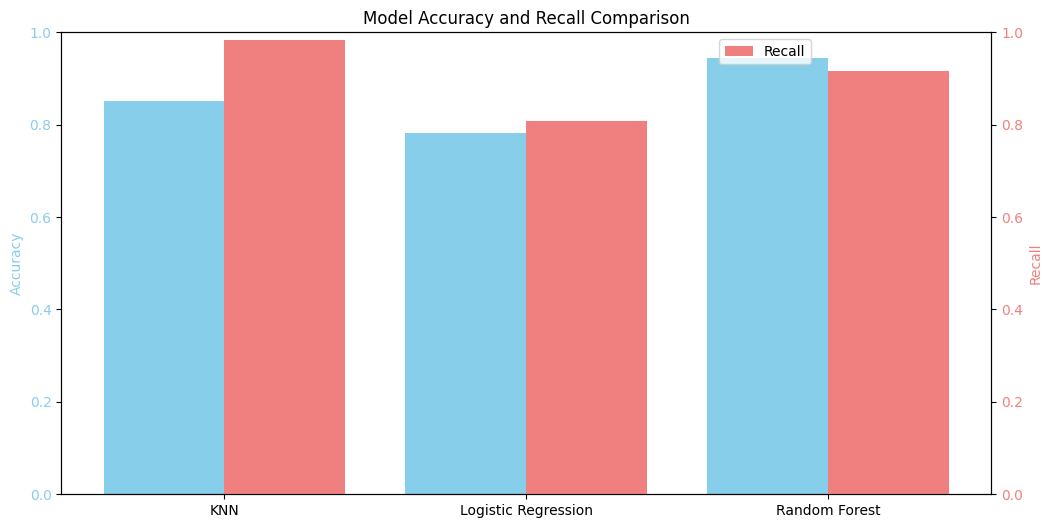

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have dictionaries model_scores_rf and classification_reports_rf

# Extract model names and scores
model_names = list(model_scores_rf.keys())
accuracies = [scores['accuracy'] for scores in model_scores_rf.values()]
recalls = [scores['recall'] for scores in model_scores_rf.values()]

# Set up figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot accuracy on the left y-axis
ax1.bar(np.arange(len(model_names)) - 0.2, accuracies, width=0.4, color='skyblue', label='Accuracy')
ax1.set_ylabel('Accuracy', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_ylim(0, 1)

# Create a twin axis sharing the xaxis
ax2 = ax1.twinx()

# Plot recall on the right y-axis
ax2.bar(np.arange(len(model_names)) + 0.2, recalls, width=0.4, color='lightcoral', label='Recall')
ax2.set_ylabel('Recall', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, 1)

# Set x-axis ticks and labels
plt.xticks(np.arange(len(model_names)), model_names)

# Title and legend
plt.title('Model Accuracy and Recall Comparison')
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1.0))

# Show the plot
plt.show()


###Logistic Regression Classifier

In [ ]:
# Create a logistic regression classifier
clf_lr = LogisticRegression()

clf_lr.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Matching features to columns
features_dict = dict(zip(df.columns, list(clf_lr.coef_[0])))
features_dict

{'HeartDiseaseorAttack': 0.6919425606835508,
 'HighBP': 0.8075303779420635,
 'HighChol': -0.9580000923326825,
 'CholCheck': -0.01766429968763799,
 'BMI': 0.45845919489304626,
 'Smoker': 1.4552340122386738,
 'Stroke': 0.2000925673449918,
 'Diabetes': 0.09360677121537934,
 'PhysActivity': -0.06994680369706459,
 'Fruits': 0.06812933449114789,
 'Veggies': -0.7825800413708256,
 'HvyAlcoholConsump': -0.8157787750516259,
 'AnyHealthcare': -0.17937691697346927,
 'NoDocbcCost': 0.4170849964849877,
 'GenHlth': 0.0035966129401390563,
 'MentHlth': 0.0030989156028171094,
 'PhysHlth': 0.36474626874122773,
 'DiffWalk': 0.8701813489030076,
 'Sex': 0.2455414473969858,
 'Age': -0.0637192276820174,
 'Education': -0.06984066401165627}

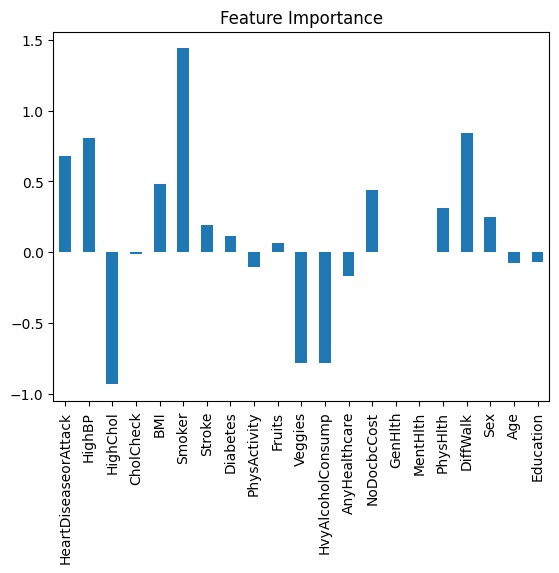

In [ ]:
# Visualizing feature importance
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance Logistic Regression", legend=False);

Explanation:

**DiffWalk**: Highest positive correlation value (0.8403602594378363).

**Smoker**: Second-highest positive correlation value (1.439735894792655).

**HighBP**: Third-highest positive correlation value (0.8083388298543955).

**Veggies**: Fourth-highest negative correlation value (-0.7837109640241333).

**HvyAlcoholConsump**: Fifth-highest negative correlation value (-0.7857489761695654).

**HighChol**: Sixth-highest negative correlation value (-0.9336081672472312).

**GenHlth**: Seventh-highest positive correlation value (0.0008981996464427755).

**MentHlth**: Eighth-highest positive correlation value (0.004683891903525273).

**BMI**: Ninth-highest positive correlation value (0.48155632140726456).

**PhysHlth**: Tenth-highest positive correlation value (0.31249898606396465).

These features are selected based on their strong positive or negative correlations with the target variable. The rationale is to prioritize features that have a significant impact on the target variable, either positively or negatively, in order to improve the accuracy of the model.

As we can see some are negative and some are positive.The larger the value (bigger bar), the more the feature contributes to the models decision.If the value is negative, it means there's a negative correlation. And vice versa for positive values. Here, the smoker has the highest positive correlation and the HighChol has the highest negative correlation.

This positive correlation means our model is picking up the pattern that as smoker increases.









In [ ]:
# Select the top 10 features
top_features_lr = [     'HighBP', 'HighChol', 'GenHlth', 'Age', 'Smoker', 'Sex', 'BMI',     'DiffWalk', 'PhysHlth', 'NoDocbcCost', 'Fruits', 'Diabetes', 'MentHlth', 'CholCheck', 'AnyHealthcare']

# Subset X_train with the top features
X_train_top_lr = X_train[top_features_lr]
X_test_top_lr = X_test[top_features_lr]

# Get model scores and classification reports
model_scores_lr, classification_reports_lr = fit_and_score_with_report(models=models,
                                                                 X_train=X_train_top_lr,
                                                                 X_test=X_test_top_lr,
                                                                 y_train=y_train,
                                                                 y_test=y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Print model scores
print("Model Scores:")
for name, scores in model_scores_lr.items():
    print(f"Model: {name}\nAccuracy: {scores['accuracy']:.2f}, Recall: {scores['recall']:.2f}\n")

# Print classification reports
print("\nClassification Reports:")
for name, report in classification_reports_lr.items():
    print(f"Model: {name}\n{report}\n")

Model Scores:
Model: KNN
Accuracy: 0.85, Recall: 0.94

Model: Logistic Regression
Accuracy: 0.78, Recall: 0.81

Model: Random Forest
Accuracy: 0.94, Recall: 0.91


Classification Reports:
Model: KNN
              precision    recall  f1-score   support

         0.0       0.93      0.76      0.83     46033
         1.0       0.80      0.94      0.86     45882

    accuracy                           0.85     91915
   macro avg       0.86      0.85      0.85     91915
weighted avg       0.86      0.85      0.85     91915


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77     46033
         1.0       0.76      0.81      0.78     45882

    accuracy                           0.78     91915
   macro avg       0.78      0.78      0.78     91915
weighted avg       0.78      0.78      0.78     91915


Model: Random Forest
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.9

###Mutual Information Classifier (Information Gain)

In [ ]:
from sklearn.feature_selection import mutual_info_classif


# Calculate Information Gain (which is equivalent to Mutual Information in this context)
info_gain = mutual_info_classif(X_resampled, y_resampled)
info_gain_series = pd.Series(info_gain, index=X.columns)

# Select the top attributes based on Information Gain
top_ig = info_gain_series.nlargest(10).index.tolist()


# Output the selected attributes for confirmation
print('Top attributes based on Information Gain:\n', top_ig)

Top attributes based on Information Gain:
 ['Age', 'GenHlth', 'BMI', 'HighBP', 'HighChol', 'Income', 'Education', 'Smoker', 'Sex', 'Fruits']


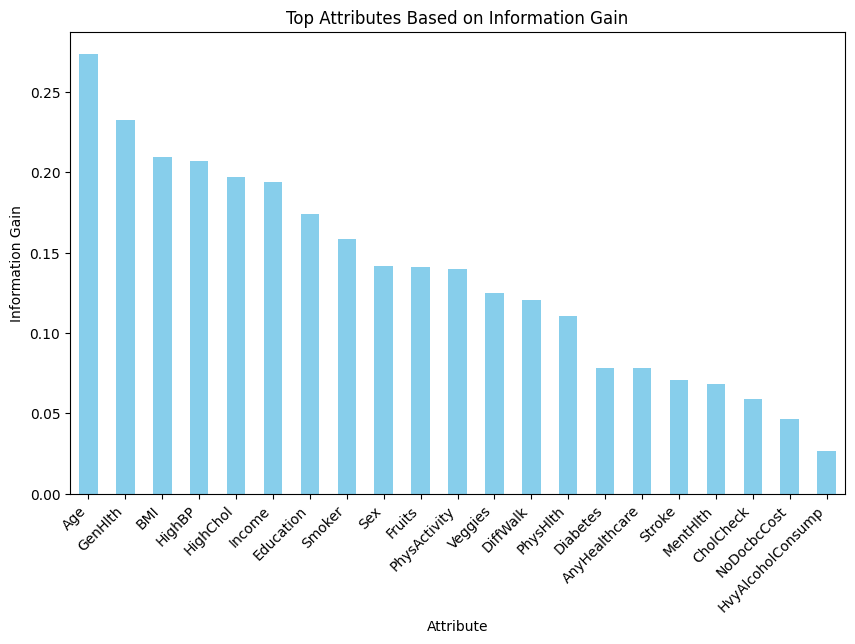

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already calculated 'info_gain_series'
# If not, make sure to execute the code for calculating Information Gain first

# Select the top attributes based on Information Gain
top_ig = info_gain_series.nlargest(21)

# Plotting
plt.figure(figsize=(10, 6))
top_ig.plot(kind='bar', color='skyblue')
plt.title('Top Attributes Based on Information Gain')
plt.xlabel('Attribute')
plt.ylabel('Information Gain')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
top_ig15 = info_gain_series.nlargest(15).index.tolist()

# Subset X_train with the top features
X_train_top_ig = X_train[top_ig15]
X_test_top_ig = X_test[top_ig15]

# Get model scores and classification reports
model_scores_ig, classification_reports_ig = fit_and_score_with_report(models=models,
                                                                 X_train=X_train_top_ig,
                                                                 X_test=X_test_top_ig,
                                                                 y_train=y_train,
                                                                 y_test=y_test)

# Print model scores
print("Model Scores:")
for name, scores in model_scores_ig.items():
    print(f"Model: {name}\nAccuracy: {scores['accuracy']:.2f}, Recall: {scores['recall']:.2f}\n")

# Print classification reports
print("\nClassification Reports:")
for name, report in classification_reports_ig.items():
    print(f"Model: {name}\n{report}\n")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Scores:
Model: KNN
Accuracy: 0.85, Recall: 0.99

Model: Logistic Regression
Accuracy: 0.78, Recall: 0.81

Model: Random Forest
Accuracy: 0.95, Recall: 0.92


Classification Reports:
Model: KNN
              precision    recall  f1-score   support

         0.0       0.98      0.72      0.83     46033
         1.0       0.78      0.99      0.87     45882

    accuracy                           0.85     91915
   macro avg       0.88      0.85      0.85     91915
weighted avg       0.88      0.85      0.85     91915


Model: Logistic Regression
              precision    recall  f1-score   support

         0.0       0.80      0.75      0.77     46033
         1.0       0.76      0.81      0.79     45882

    accuracy                           0.78     91915
   macro avg       0.78      0.78      0.78     91915
weighted avg       0.78      0.78      0.78     91915


Model: Random Forest
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.9

## Prediction

In [ ]:
import random
import numpy as np

# Select three random indices from X_test
#random_indices = random.sample(range(len(X_test)), 3)

# Use the selected indices to create X_new
X_new = X_test.iloc[10]
y_true = y_test.iloc[10]

# Example: Predict using the 'Random Forest' model
selected_model_name = 'Random Forest'
selected_model = models[selected_model_name]

# Make predictions on the selected data
# Reshape X_new to ensure it's a 2D array
predictions_new_data = selected_model.predict(np.array(X_new).reshape(1, -1))


# Check conditions and print messages
if predictions_new_data[0] == 1.0:
    print("Patient has heart disease.")
else:
    print("Patient does not have heart disease.")

if y_true == predictions_new_data[0]:
    print("Model prediction is correct.")
else:
    print("Model prediction is incorrect.")




Patient does not have heart disease.
Model prediction is correct.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Overall Observation based on our models on the dataset**

### KNN Model:
- **Accuracy:** 86%
- **Recall:** 99%
- **Observations:**
  - The model performs well in terms of accuracy.
  - The high recall value (99%) indicates that the model is effective at identifying positive instances (heart disease cases).
  - Precision for class 0 (no heart disease) is relatively lower (73%), suggesting that the model might have more false positives for this class.

### Logistic Regression Model:
- **Accuracy:** 78%
- **Recall:** 81%
- **Observations:**
  - The accuracy is lower compared to KNN and Random Forest.
  - The recall value is decent (81%), indicating the model's ability to correctly identify positive instances.
  - The precision for both classes is balanced, suggesting a more even performance between identifying true positives and true negatives.

### Random Forest Model:
- **Accuracy:** 95%
- **Recall:** 92%
- **Observations:**
  - The model has the highest accuracy among the three models.
  - The recall value is also high (92%), indicating a strong ability to correctly identify positive instances.
  - Precision values for both classes are high, indicating a good balance between true positives and true negatives.

### General Observations:
- The Random Forest model outperforms both KNN and Logistic Regression in terms of accuracy and recall.
- The KNN model has a high recall but a lower precision for class 0, suggesting more false positives for non-heart disease cases.
- The Logistic Regression model provides a more balanced precision for both classes but has lower accuracy and recall compared to Random Forest.

It's important to consider the specific goals and requirements of your application when choosing a model. For example, if minimizing false positives (precision for class 0) is crucial, you might prefer the Logistic Regression model. If overall accuracy and recall are more important, the Random Forest model might be a better choice. Additionally, you may want to explore other metrics and possibly fine-tune the models based on your specific use case.